# CDS503 - Machine Learning Final Project

Semester 2, Academic Session 2019/2020

Group 6 - **Data Masters**

Members:
- Lee Yong Meng
- Lee Kar Choon
- Tan Wei Chean
- Yee Hoong Yip

## Overview

- [Data Preparation](#Data-Preparation)
- Experiment Set 1: Machine Learning Algorithm
- Experiment Set 2: Feature Selection
- [Experiment Set 3: Ensemble Learning](#Experiment-Set-3:-Ensemble-Learning)
  - [3.0 Default Classifiers](#3.0-Default-Classifiers)
  - [3.1 Bagging](#3.1-Bagging)
  - [3.2 Boosting](#3.2-Boosting)
  - [3.3 Voting](#3.3-Voting)
- Experiment Set 4: Training Sample Size

# Data Preparation

Before working on the experiment sets, we need to import some necessary libraries for working on data pre-processing and conducting experiment sets.

In [1]:
# Standard Python libraries
import pandas as pd                  # Use pandas.DataFrame to manipulate data
import matplotlib.pyplot as plt      # Standard plotting library
import numpy as np                   # Standard Python library for numerical operations

# Data preprocessing
from sklearn import preprocessing    # Data preprocessing

# Model selection - split data, cv, model evaluation
from sklearn.model_selection import train_test_split    # Split dataset into training and test sets
from sklearn.model_selection import cross_val_score     # k-fold cross-validation
from sklearn import metrics                             # metrics to evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix    # analyze prediction made by the classification model

# Machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Ensemble learning methods
# --- Bagging
from sklearn.ensemble import BaggingClassifier            # Bagging - (B)ootstrap (AGG)regat(ING)
from sklearn.ensemble import RandomForestClassifier       # Random Forest
# --- Boosting
from sklearn.ensemble import AdaBoostClassifier           # (ADA)ptive (BOOST)ing
from sklearn.ensemble import GradientBoostingClassifier   # Gradient Boosting
# --- Voting
from sklearn.ensemble import VotingClassifier             # Voting

# Itertools - here, used to generate combinations of base classifiers for voting
import itertools

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Reading CSV file

Next, we read in the data.

In [3]:
# Read in data
df = pd.read_csv('AppleStore.csv')

# Quick view on the data
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Several columns in the datasets are not helpful in our work. Therefore, we will remove these columns.

- `Id`: App ID
- `track_name`: App name
- Unnamed: the first column, which is the count of the record.

We use the method `.drop()` to remove the specified columns.

In [4]:
# df.drop(['id'], axis = 1, inplace = True)
# df.drop(['track_name'], axis = 1, inplace = True)

# Define columns to drop
columns_drop = ['id', 'track_name']

# Drop columns
df.drop(columns_drop, axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('unnamed', case = False)], axis = 1, inplace = True)
df.head()

,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


## Grouping `user_rating` using `pd.cut()` 

For our business problem, we would like to group the column `user_rating` (i.e. our target column) into three groups, namely "Low", "Medium" and "High". We use the function `pd.cut()` to perform the binning. Then, we add a new column `user_rating_label` into the data frame, which will be shown at the very end when the data frame preview is scrolling horizontally.

In [5]:
df['user_rating_label'] = pd.cut(df['user_rating'], bins = 3, labels = ['Low', 'Medium', 'High'])
df.head()

,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating_label
0,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,High
1,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,High
2,100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,High
3,128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,High
4,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,High


Next, we will drop two other columns:
- `user_rating`: no longer needed because we will be using the new column `user_rating_label` as the target of classification.
- `currency`: not helpful because it only has one unique value "USD" for all examples.

In [6]:
# Define columns to drop
columns_drop = ['user_rating', 'currency']

# Drop columns
df.drop(columns_drop, axis = 1, inplace = True)
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating_label
0,100788224,3.99,21292,26,4.5,6.3.5,4+,Games,38,5,10,1,High
1,158578688,0.00,161065,26,3.5,8.2.2,4+,Productivity,37,5,23,1,High
2,100524032,0.00,188583,2822,4.5,5.0.0,4+,Weather,37,5,3,1,High
3,128512000,0.00,262241,649,4.5,5.10.0,12+,Shopping,37,5,9,1,High
4,92774400,0.00,985920,5320,5.0,7.5.1,4+,Reference,37,5,45,1,High


We further inspect the data by calling the method `.info()`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
size_bytes           7197 non-null int64
price                7197 non-null float64
rating_count_tot     7197 non-null int64
rating_count_ver     7197 non-null int64
user_rating_ver      7197 non-null float64
ver                  7197 non-null object
cont_rating          7197 non-null object
prime_genre          7197 non-null object
sup_devices.num      7197 non-null int64
ipadSc_urls.num      7197 non-null int64
lang.num             7197 non-null int64
vpp_lic              7197 non-null int64
user_rating_label    7197 non-null category
dtypes: category(1), float64(2), int64(7), object(3)
memory usage: 682.0+ KB


We see that there is no missing values in our data.

Some of the columns contain `String` values which might not be compatible to certain machine learning algorithms that will be implemented in the subsequent sections. Therefore, we need to transform the data into labels encoded by numeric values (i.e., 0, 1, 2, ...).

## Label Encoding - Categorical Attributes

We use `sklearn.preprocessing.LabelEncoder()` to transform the following columns into numeric labels:
- `prime_genre`: contains 22 unique `String` values.
- `user_rating_label`: contains 3 unique `String` values ("Low", "Medium", "High")
- `cont_rating`: app content rating, contains 4 unique `String` values.
- `ver`: app version, contains 1590 unique `String` values.

In [8]:
# from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Define names of columns selected for label encoding
col_categories = ["cont_rating", "prime_genre", "user_rating_label", "ver"]
col_num_unique_values = dict()

for col_name in col_categories:
    count = len(df[col_name].unique())
    col_num_unique_values[col_name] = count
    
    print("Column name: {}\n>>> There are {} unique values.".format(col_name, count))
    
    df[col_name] = le.fit_transform(df[col_name])
    df[col_name] = df[col_name].astype(str)

print()

df.info()

Column name: cont_rating
>>> There are 4 unique values.
Column name: prime_genre
>>> There are 23 unique values.
Column name: user_rating_label
>>> There are 3 unique values.
Column name: ver
>>> There are 1590 unique values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
size_bytes           7197 non-null int64
price                7197 non-null float64
rating_count_tot     7197 non-null int64
rating_count_ver     7197 non-null int64
user_rating_ver      7197 non-null float64
ver                  7197 non-null object
cont_rating          7197 non-null object
prime_genre          7197 non-null object
sup_devices.num      7197 non-null int64
ipadSc_urls.num      7197 non-null int64
lang.num             7197 non-null int64
vpp_lic              7197 non-null int64
user_rating_label    7197 non-null object
dtypes: float64(2), int64(7), object(4)
memory usage: 731.1+ KB


In [9]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,user_rating_label
0,100788224,3.99,21292,26,4.5,1379,2,7,38,5,10,1,0
1,158578688,0.00,161065,26,3.5,1514,2,15,37,5,23,1,0
2,100524032,0.00,188583,2822,4.5,1210,2,22,37,5,3,1,0
3,128512000,0.00,262241,649,4.5,1236,0,17,37,5,9,1,0
4,92774400,0.00,985920,5320,5.0,1472,2,16,37,5,45,1,0


Then, the data after data preprocessing is saved into a new CSV file.

In [10]:
# df.to_csv(r'AppleStore_preprocessed.csv', index = False, header = True)

## Defining Target and Features and Splitting Dataset

The attribute `user_rating_label` is chosen as the target throught the experiment sets. At this stage, all the other attributes are selected as the features used for predicting the `user_rating_label` to this classification problem.

In [11]:
# Target - `user_rating_label`
target = df['user_rating_label']

# Feature - all other attributes
features = df.drop('user_rating_label', axis = 1)

Finally, the dataset is split into training and test sets, with proportions of 80% and 20% respectively.

In [12]:
# from sklearn.model_selection import train_test_split    # Split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [13]:
# Define helper function - to evaluate model performance. 
def test_model(estimator, x_train, x_test, y_train, y_test, score="accuracy", average=None, clf_report=False):
    # Function within function #1
    # ---
    # Print model performance based on user-specified metric and average
    def test_scoring(y_test, y_pred, score="accuracy", average=None):
        score_lower = score.lower()
        score_metric = 0

        if average is None:
            average = "weighted"
            
        if score_lower == "accuracy":
            score_metric = metrics.accuracy_score(y_test, y_pred)
        elif score_lower == "precision":
            score_metric = metrics.precision_score(y_test, y_pred, average=average)
        elif score_lower == "recall":
            score_metric = metrics.recall_score(y_test, y_pred, average=average)
        elif score_lower == "f1_score":
            score_metric = metrics.f1_score(y_test, y_pred, average=average)
            
        score_name = ""
        
        if score_lower != "accuracy":
            score_name += average.capitalize() + " "
        
        score_name += score.capitalize()

        print("{} (Test):".format(score_name), end=' ')
        print("{:.4f}".format(score_metric))
        
        return {"name": score_name, "score": score_metric}
        
    
    # Function within function #2
    # ---
    # Print model performance report - confusion matrix and classification report
    def test_clf_report(y_test, y_pred):
        print("Confusion matrix:\n---")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification report:\n---")
        print(classification_report(y_test, y_pred))
    
    # ---
    
    # Training - fit training set into the estimator
    estimator.fit(x_train, y_train)
    
    # Testing - Predict the outcome/label
    y_predict = estimator.predict(x_test)
    
    # Print model performance - single metric
    dict_scoring = test_scoring(y_test, y_predict, score, average)
    
    # Print model performance report (optional)
    if clf_report:
        print()
        test_clf_report(y_test, y_predict)
        
    return dict_scoring

Now that we are ready to conduct the experiment sets.

## Additional Step - Standard Scaling

This step is to standardize the features of the original dataset so that the values of each attribute has a mean, $\mu = 0$, and standard deviation, $\sigma = 1$.

**Note that the same step is performed on training and test features (i.e., `x_train` and `x_test`) separately to prevent _"data leakage"_. We do not want the information from the test set (e.g., outliers) to _leak_ into the training data.**

In [14]:
# Define helper function
def standardize_features(df):
    """
    Helper function to standardize the values of df so that the values of each attribute (column)
    has a mean value of 0 and standard deviation value of 1.
    
    Parameters
    ---
    df: specify a data frame which requires standardization on the values on each column.
    
    Return
    ---
    A data frame with standardized column values.
    """
    
    # Names of the features
    names = df.columns
    
    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=names)
    
    return df_scaled

In [15]:
# Test helper function docstring (optional) :D
# help(standardize_features)

In [16]:
# Standard scaling on training features
scaled_x_train = standardize_features(x_train)

# Standard scaling on test features
scaled_x_test = standardize_features(x_test)

# Experiment Set 3: Ensemble Learning

## 3.0 Default Classifiers

We start with a few selected classifiers with their respective default parameters without ensemble method.

In [17]:
# Define dictionary of classifiers
# max_iter - stopping criteria: to speed up the training process
dict_clf_default = {
    # --- clf_index: 0 - 4
    "K-Nearest Neighbors": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(random_state=0), 
    "Gaussian Naive Bayes": GaussianNB(), 
    "Bernoulli Naive Bayes": BernoulliNB(), 
    "Multinomial Naive Bayes": MultinomialNB(), 
    # --- clf_index: 5 - 9
    "Linear SVM": SVC(kernel='linear', max_iter=10000), 
    "Polynomial SVM": SVC(kernel='poly', max_iter=10000), 
    "RBF SVM": SVC(kernel='rbf', max_iter=10000), 
    "Sigmoid SVM": SVC(kernel='sigmoid', max_iter=10000),
    "Logistic Regression": LogisticRegression()
   }

Specify the `clf_index` from 0 - 9, each corresponding to the default classifier defined in `dict_clf_default`. 

Helper function `test_model()` is called to test the model test performance.

In [18]:
# Specify one classifier
clf_index = 2

estimator_name = list(dict_clf_default.keys())[clf_index]
estimator = dict_clf_default[estimator_name]

# Print classifier name
print("{}\n===".format(estimator_name))

# Test using features with original Scale
print("Original scale\n---")
_ = test_model(estimator, x_train, x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

# Test using features with standardized scale
print("\nStandardized scale\n---")
_ = test_model(estimator, scaled_x_train, scaled_x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

Gaussian Naive Bayes
===
Original scale
---
Macro F1_score (Test): 0.1799

Confusion matrix:
---
[[179 923   0]
 [  0 189   0]
 [ 12 137   0]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.94      0.16      0.28      1102
           1       0.15      1.00      0.26       189
           2       0.00      0.00      0.00       149

    accuracy                           0.26      1440
   macro avg       0.36      0.39      0.18      1440
weighted avg       0.74      0.26      0.25      1440


Standardized scale
---
Macro F1_score (Test): 0.2901

Confusion matrix:
---
[[467   1 634]
 [  2   5 182]
 [ 21   1 127]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.95      0.42      0.59      1102
           1       0.71      0.03      0.05       189
           2       0.13      0.85      0.23       149

    accuracy                           0.42      1440
   macro avg       0.60  

We can also compare the test performance of different models by using a `for` loop.

Then, initialize two list variables: `list_clf` and `list_score`. These two lists are used to store list of classifier names and model test performance respectively. These values are used to generate a CSV file and bar plot respectively.

Then, a horizontal barplot is generated to visualize the test performance by using the function `matplotlib.pyplot.barh()`.

- K-Nearest Neighbors
Macro F1_score (Test): 0.3329

- Decision Tree
Macro F1_score (Test): 0.7732

- Gaussian Naive Bayes
Macro F1_score (Test): 0.1799

- Bernoulli Naive Bayes
Macro F1_score (Test): 0.5452

- Multinomial Naive Bayes
Macro F1_score (Test): 0.3060

- Linear SVM
Macro F1_score (Test): 0.1019

- Polynomial SVM
Macro F1_score (Test): 0.2890

- RBF SVM
Macro F1_score (Test): 0.2890

- Sigmoid SVM
Macro F1_score (Test): 0.2890

- Logistic Regression
Macro F1_score (Test): 0.2890



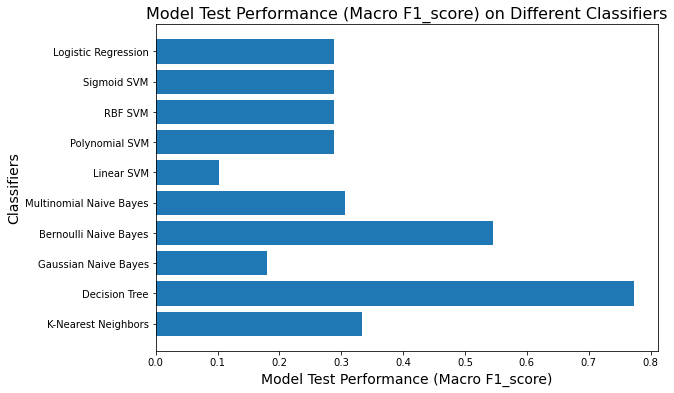

In [19]:
# Compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "macro"

feature_train = x_train
feature_test = x_test
# feature_train = scaled_x_train
# feature_test = scaled_x_test


# Generating results
# ---
# Iterate through all classifiers
for clf in dict_clf_default:
    print("- {}".format(clf))
    estimator = dict_clf_default[clf]
    try:
        score = test_model(estimator, feature_train, feature_test, y_train, y_test,
                      score=score_param, average=average_param)
        
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
        
    print()
    
    list_clf.append(clf)
    list_score.append(score["score"])

    
# Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file
# df_performance.to_csv(r'final_project_performance_default.csv', index = False, header = True)


# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("{} on Different Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Classifiers", fontsize=(font_size + 2))

plt.show()

# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_default.png", dpi=300, bbox_inches="tight")

## 3.1 Bagging

Recall the definition of `dict_clf_default` from the [earlier section](#3.0-Default-Classifiers).

In [20]:
_ = [print("Index: {} - {}".format(i, clf)) for i, clf in enumerate(dict_clf_default.keys())]

Index: 0 - K-Nearest Neighbors
Index: 1 - Decision Tree
Index: 2 - Gaussian Naive Bayes
Index: 3 - Bernoulli Naive Bayes
Index: 4 - Multinomial Naive Bayes
Index: 5 - Linear SVM
Index: 6 - Polynomial SVM
Index: 7 - RBF SVM
Index: 8 - Sigmoid SVM
Index: 9 - Logistic Regression


Specify the `clf_index` from 0 - 9 as a base classifier in bagging approach, each corresponding to the classifier defined in `dict_clf_default`.

In [21]:
# Specify classifier
clf_index = 1

estimator_name = list(dict_clf_default.keys())[clf_index]
estimator = list(dict_clf_default.values())[clf_index]

bagging_param = dict(base_estimator=estimator,
                     n_estimators=100,
                     random_state=0)

model_bagging = BaggingClassifier(**bagging_param)

# Print classifier name
print("{}\n===".format(estimator_name))

# Test using features with original Scale
print("Original scale\n---")
_ = test_model(model_bagging, x_train, x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

# Test using features with standardized scale
print("\nStandardized scale\n---")
_ = test_model(model_bagging, scaled_x_train, scaled_x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

Decision Tree
===
Original scale
---
Macro F1_score (Test): 0.8090

Confusion matrix:
---
[[1075    2   25]
 [   4  182    3]
 [  88    1   60]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1102
           1       0.98      0.96      0.97       189
           2       0.68      0.40      0.51       149

    accuracy                           0.91      1440
   macro avg       0.86      0.78      0.81      1440
weighted avg       0.90      0.91      0.91      1440


Standardized scale
---
Macro F1_score (Test): 0.5484

Confusion matrix:
---
[[881 211  10]
 [  1 186   2]
 [ 71  59  19]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1102
           1       0.41      0.98      0.58       189
           2       0.61      0.13      0.21       149

    accuracy                           0.75      1440
   macro avg       0.65

**Random forest** is another ensemble learning method. You can think of random forest as a collection of smaller (but different) trees (same machine learning algorithms) so it is included in the comparison with other *bagging* methods by specifying different base classifiers.

However, note that there are still some differences between *bagging* method and a *random forest* method. Click [here](https://stats.stackexchange.com/a/364453) for more.

In [22]:
# Specify classifier - Random Forest
random_forest_param = dict(
                     n_estimators=100,
                     random_state=0)

rf_clf = RandomForestClassifier(**random_forest_param)

# Print classifier name
# print("{}\n===".format(estimator_name))
print("Random Forest Classifier\n===")

# Test using features with original Scale
print("Original scale\n---")
test_model(rf_clf, x_train, x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

# Test using features with standardized scale
print("\nStandardized scale\n---")
test_model(rf_clf, scaled_x_train, scaled_x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

Random Forest Classifier
===
Original scale
---
Macro F1_score (Test): 0.8103

Confusion matrix:
---
[[1078    1   23]
 [   4  182    3]
 [  90    0   59]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1102
           1       0.99      0.96      0.98       189
           2       0.69      0.40      0.50       149

    accuracy                           0.92      1440
   macro avg       0.87      0.78      0.81      1440
weighted avg       0.91      0.92      0.91      1440


Standardized scale
---
Macro F1_score (Test): 0.5425

Confusion matrix:
---
[[885 211   6]
 [  2 185   2]
 [ 71  61  17]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1102
           1       0.40      0.98      0.57       189
           2       0.68      0.11      0.20       149

    accuracy                           0.75      1440
   macro avg

{'name': 'Macro F1_score', 'score': 0.5424603392593683}

- K-Nearest Neighbors
Macro F1_score (Test): 0.3292

- Decision Tree
Macro F1_score (Test): 0.8090

- Gaussian Naive Bayes
Macro F1_score (Test): 0.1957

- Bernoulli Naive Bayes
Macro F1_score (Test): 0.5452

- Multinomial Naive Bayes
Macro F1_score (Test): 0.3119

- Linear SVM
Macro F1_score (Test): 0.2890

- Polynomial SVM
Macro F1_score (Test): 0.2890

- RBF SVM
Macro F1_score (Test): 0.2890

- Sigmoid SVM
Macro F1_score (Test): 0.2890

- Logistic Regression
Macro F1_score (Test): 0.2890

- Random Forest*
Macro F1_score (Test): 0.8103


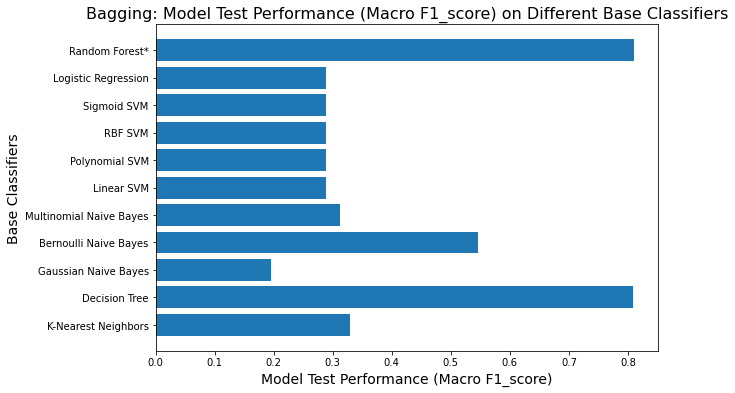

In [23]:
# Compare all classifiers
list_clf = []
list_score = []

score_param = "f1_score"
average_param = "macro"

feature_train = x_train
feature_test = x_test
# feature_train = scaled_x_train
# feature_test = scaled_x_test

bagging_param = dict(n_estimators=100, random_state=0)

# Loop through all classifiers
for i, clf in enumerate(dict_clf_default):
    print("- {}".format(clf))
    estimator = dict_clf_default[clf]
    
    params = bagging_param.copy()
    params["base_estimator"] = estimator

    model_bagging = BaggingClassifier(**params)
    
    try:
        score = test_model(model_bagging, feature_train, feature_test, y_train, y_test, 
                           score=score_param, average=average_param)
        
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
    
    print()
    
    list_clf.append(clf)
    list_score.append(score["score"])

# (Bonus) Random Forest classifier
model_rf = RandomForestClassifier(**bagging_param)

name_rf = "Random Forest*"
print("- {}".format(name_rf))

score_rf = test_model(model_rf, feature_train, feature_test, y_train, y_test,
                      score=score_param, average=average_param)

list_clf.append(name_rf)
list_score.append(score_rf["score"])

# Create data frame
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file
# df_performance.to_csv(r'final_project_performance_bagging.csv', index = False, header = True)

# Plotting for comparison
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("Bagging: {} on Different Base Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Base Classifiers", fontsize=(font_size + 2))

plt.show()

# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_bagging.png", dpi=300, bbox_inches="tight")

## 3.2 Boosting

Recall the definition of `dict_clf_default` from the [earlier section](#3.0-Default-Classifiers).

In [24]:
_ = [print("Index: {} - {}".format(i, clf)) for i, clf in enumerate(dict_clf_default)]

Index: 0 - K-Nearest Neighbors
Index: 1 - Decision Tree
Index: 2 - Gaussian Naive Bayes
Index: 3 - Bernoulli Naive Bayes
Index: 4 - Multinomial Naive Bayes
Index: 5 - Linear SVM
Index: 6 - Polynomial SVM
Index: 7 - RBF SVM
Index: 8 - Sigmoid SVM
Index: 9 - Logistic Regression


Specify the `clf_index` from 0 - 9 as a base classifier in AdaBoost approach, each corresponding to the classifier defined in `dict_clf_default`.

In [25]:
# Specify one classifier
clf_index = 1

estimator_name = list(dict_clf_default.keys())[clf_index]
estimator = list(dict_clf_default.values())[clf_index]

boosting_param = dict(base_estimator=estimator,
                     n_estimators=100,
                     random_state=0)

model_boosting = AdaBoostClassifier(**boosting_param)

# Print classifier name
print("{}\n===".format(estimator_name))

# Test using features with original Scale
print("Original scale\n---")
test_model(model_boosting, x_train, x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

# Test using features with standardized scale
print("\nStandardized scale\n---")
test_model(model_boosting, scaled_x_train, scaled_x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

Decision Tree
===
Original scale
---
Macro F1_score (Test): 0.7786

Confusion matrix:
---
[[1035   18   49]
 [   4  180    5]
 [  79    5   65]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1102
           1       0.89      0.95      0.92       189
           2       0.55      0.44      0.49       149

    accuracy                           0.89      1440
   macro avg       0.79      0.78      0.78      1440
weighted avg       0.88      0.89      0.88      1440


Standardized scale
---
Macro F1_score (Test): 0.5527

Confusion matrix:
---
[[826 224  52]
 [  3 185   1]
 [ 56  62  31]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1102
           1       0.39      0.98      0.56       189
           2       0.37      0.21      0.27       149

    accuracy                           0.72      1440
   macro avg       0.57

{'name': 'Macro F1_score', 'score': 0.5527015360104258}

Besides `AdaBoostClassifier`, there is also another boosting algorithms available in the `sklearn` library, which is  `GradientBoostingClassifier`.

For a **Gradient Boost** method, a base estimator is not required.

In [26]:
# Specify classifier - Gradient Boosting Classifier
gradient_boosting_param = dict(n_estimators=100, random_state=0)

model_boosting = GradientBoostingClassifier(**gradient_boosting_param)

# Print classifier name
print("Gradient Boosting\n===")

# Test using features with original Scale
print("Original scale\n---")
test_model(model_boosting, x_train, x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

# Test using features with standardized scale
print("\nStandardized scale\n---")
test_model(model_boosting, scaled_x_train, scaled_x_test, y_train, y_test, 
           score="f1_score", average="macro", clf_report=True)

Gradient Boosting
===
Original scale
---
Macro F1_score (Test): 0.8102

Confusion matrix:
---
[[1072    0   30]
 [   5  181    3]
 [  86    1   62]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1102
           1       0.99      0.96      0.98       189
           2       0.65      0.42      0.51       149

    accuracy                           0.91      1440
   macro avg       0.86      0.78      0.81      1440
weighted avg       0.90      0.91      0.91      1440


Standardized scale
---
Macro F1_score (Test): 0.6438

Confusion matrix:
---
[[1001   78   23]
 [   1  186    2]
 [  75   47   27]]

Classification report:
---
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1102
           1       0.60      0.98      0.74       189
           2       0.52      0.18      0.27       149

    accuracy                           0.84      1440
   macro a

{'name': 'Macro F1_score', 'score': 0.6438089314784499}

- K-Nearest Neighbors
ValueError: KNeighborsClassifier doesn't support sample_weight.

- Decision Tree
Macro F1_score (Test): 0.7786

- Gaussian Naive Bayes
Macro F1_score (Test): 0.0896

- Bernoulli Naive Bayes
Macro F1_score (Test): 0.6221

- Multinomial Naive Bayes
Macro F1_score (Test): 0.2410

- Linear SVM
TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.

- Polynomial SVM
TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.

- RBF SVM
TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or

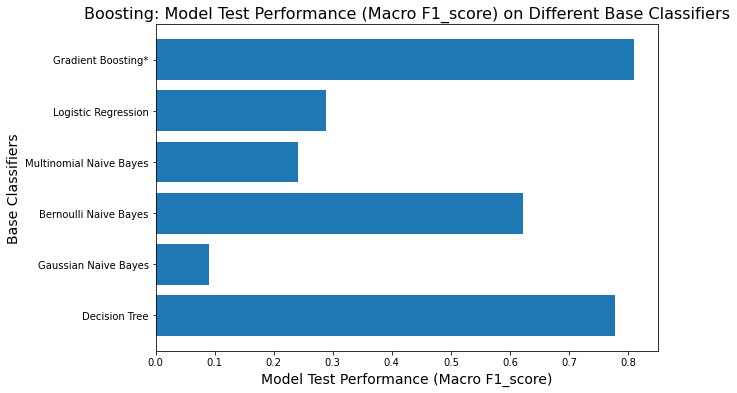

In [27]:
# Compare all classifiers
list_clf = []
list_score = []

# Specify model evaluation metric
score_param = "f1_score"
average_param = "macro"

feature_train = x_train
feature_test = x_test
# feature_train = scaled_x_train
# feature_test = scaled_x_test

# Initialize parameter values of boosting classifier
boosting_param = dict(n_estimators=100, random_state=0)

# Loop through all classifiers
# ---
for i, clf in enumerate(dict_clf_default):
    print("- {}".format(clf))
    estimator = dict_clf_default[clf]
    
    params = boosting_param.copy()
    params["base_estimator"] = estimator
    
    model_boosting = AdaBoostClassifier(**params)
    
    try:
        score = test_model(model_boosting, feature_train, feature_test, y_train, y_test, 
                           score=score_param, average=average_param)
    except Exception as e:
        error_class_name = e.__class__.__name__
        print("{}: {}\n".format(error_class_name, e))
        continue
    
    print()
    
    list_clf.append(clf)
    list_score.append(score["score"])

# (Bonus) Gradient Boosting Classifier
# ---
model_gb = GradientBoostingClassifier(**boosting_param)

name_gb = "Gradient Boosting*"
print("GradientBoostingClassifier\n===")
print("- {}".format(name_gb))

score_gb = test_model(model_gb, feature_train, feature_test, y_train, y_test,
                   score=score_param, average=average_param)

list_clf.append(name_gb)
list_score.append(score_gb["score"])

# Create data frame
# ---
data = dict(classifier=list_clf, test_performance=list_score)
df_performance = pd.DataFrame(data=data)

# # Save and export df_performance to CSV file
# df_performance.to_csv(r'final_project_performance_boosting.csv', index = False, header = True)

# Plotting
# ---
str_x_label = "Model Test Performance ({} {})".format(average_param.capitalize(), score_param.capitalize())
font_size = 12

plt.figure(figsize=(9, 6))
plt.barh(list_clf, list_score)

plt.title("Boosting: {} on Different Base Classifiers".format(str_x_label), fontsize=(font_size + 4))
plt.xlabel(str_x_label, fontsize=(font_size + 2))
plt.ylabel("Base Classifiers", fontsize=(font_size + 2))

plt.show()

# # Save plot into PNG (optional) 
# plt.savefig("final_project_performance_boosting.png", dpi=300, bbox_inches="tight")

## 3.3 Voting 

Voting is a method involving different machine learning algorithms.

To implement voting method, specify `num_base_clf`, the number of base classifiers when defining an object of `VotingClassifier()`.

In [28]:
# Specify model evaluation metrics
score_param = "f1_score"
average_param = "macro"

feature_train = x_train
feature_test = x_test
# feature_train = scaled_x_train
# feature_test = scaled_x_test

# specify number of base classifiers
num_base_clf = 5
list_clf = [[] for i in range(num_base_clf)]
list_score = []

# Generate all possible combinations of base classifiers with # of classifiers = num_base_clf
# For example: if num_base_clf = 4, 
# [A, B, C, D, E] -> [A, B, C, D], [A, B, C, E], [A, B, D, E], [A, C, D, E] and [B, C, D, E]
combinations_base_clf = itertools.combinations(dict_clf_default, num_base_clf)

# Loop through all generated lists
for comb in combinations_base_clf:
    list_base_clf = []
    
    # Return number of SVM and Naive Bayes classifiers in a list
    count_svm = sum("SVM" in clf for clf in comb)
    count_nb = sum("Naive Bayes" in clf for clf in comb)
    
    # At most one SVM classifiers and Naive Bayes classifiers in the list.
    # - skip all the lists with >1 SVM and >1 Naive Bayes classifiers - speed up looping process
    # - ensure variation in machine learning algorithms in the voting classifier
    if (count_svm <= 1) & (count_nb <= 1):
        for i, clf in enumerate(comb):
            list_base_clf.append((clf, dict_clf_default[clf]))
            list_clf[i].append(clf)
    
        print(comb)
        print("---")
        
        try:
            model_voting = VotingClassifier(estimators=list_base_clf)
            score = test_model(model_voting, feature_train, feature_test, y_train, y_test, 
                               score=score_param, average=average_param)
            list_score.append(score["score"])
            
        except Exception as e:
            error_class_name = e.__class__.__name__
            print("{}: {}\n".format(error_class_name, e))
            continue
        
        print()

        
# Create data frame
# ---
data = dict()
for i, base_clf in enumerate(list_clf):
    clf_key = "classifier_{}".format(i)
    data[clf_key] = base_clf

data["test_performance"] = list_score
df_performance = pd.DataFrame(data=data)

# Save and export df_performance to CSV file
df_performance.to_csv(r'final_project_performance_voting_{}clf.csv'.format(num_base_clf), index = False, header = True)

df_performance

('K-Nearest Neighbors', 'Decision Tree', 'Gaussian Naive Bayes', 'Linear SVM', 'Logistic Regression')
---
Macro F1_score (Test): 0.3410

('K-Nearest Neighbors', 'Decision Tree', 'Gaussian Naive Bayes', 'Polynomial SVM', 'Logistic Regression')
---
Macro F1_score (Test): 0.3230

('K-Nearest Neighbors', 'Decision Tree', 'Gaussian Naive Bayes', 'RBF SVM', 'Logistic Regression')
---
Macro F1_score (Test): 0.3230

('K-Nearest Neighbors', 'Decision Tree', 'Gaussian Naive Bayes', 'Sigmoid SVM', 'Logistic Regression')
---
Macro F1_score (Test): 0.3230

('K-Nearest Neighbors', 'Decision Tree', 'Bernoulli Naive Bayes', 'Linear SVM', 'Logistic Regression')
---
Macro F1_score (Test): 0.3363

('K-Nearest Neighbors', 'Decision Tree', 'Bernoulli Naive Bayes', 'Polynomial SVM', 'Logistic Regression')
---
Macro F1_score (Test): 0.3167

('K-Nearest Neighbors', 'Decision Tree', 'Bernoulli Naive Bayes', 'RBF SVM', 'Logistic Regression')
---
Macro F1_score (Test): 0.3167

('K-Nearest Neighbors', 'Decision T

,classifier_0,classifier_1,classifier_2,classifier_3,classifier_4,test_performance
0,K-Nearest Neighbors,Decision Tree,Gaussian Naive Bayes,Linear SVM,Logistic Regression,0.340997
1,K-Nearest Neighbors,Decision Tree,Gaussian Naive Bayes,Polynomial SVM,Logistic Regression,0.323023
2,K-Nearest Neighbors,Decision Tree,Gaussian Naive Bayes,RBF SVM,Logistic Regression,0.323023
3,K-Nearest Neighbors,Decision Tree,Gaussian Naive Bayes,Sigmoid SVM,Logistic Regression,0.323023
4,K-Nearest Neighbors,Decision Tree,Bernoulli Naive Bayes,Linear SVM,Logistic Regression,0.336290
5,K-Nearest Neighbors,Decision Tree,Bernoulli Naive Bayes,Polynomial SVM,Logistic Regression,0.316711
6,K-Nearest Neighbors,Decision Tree,Bernoulli Naive Bayes,RBF SVM,Logistic Regression,0.316711
7,K-Nearest Neighbors,Decision Tree,Bernoulli Naive Bayes,Sigmoid SVM,Logistic Regression,0.316711
8,K-Nearest Neighbors,Decision Tree,Multinomial Naive Bayes,Linear SVM,Logistic Regression,0.391679
9,K-Nearest Neighbors,Decision Tree,Multinomial Naive Bayes,Polynomial SVM,Logistic Regression,0.327718
